#Problema de la guía 4  
###S. Schiavinato - LU 153/11

In [22]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
plt.rcParams["figure.figsize"] = (5 * (1 + np.sqrt(5)) / 2, 5)
plt.rcParams["lines.linewidth"] = 2.5
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["axes.labelsize"] = 20

##Desarrollo teórico

Defino la densidad de masa

In [3]:
%%latex
\[\rho(r) = \frac{\rho_0}{1 + \left(\frac{r}{r_e}\right)^2}\]

<IPython.core.display.Latex object>

La probabilidad de que un elemento de fluido esté en una posición r del espacio es proporcional a la masa ocupada en un diferencia dV alrededor de ese punto, es decir

In [4]:
%%latex
\[p(\vec{r}) = \rho(r) dV = \rho(r) \,r^2 \, \text{sen}(\theta)\, dr d\theta d\phi = f(r,\theta, \phi) dr d\theta d\phi \]

<IPython.core.display.Latex object>

De esta forma

In [5]:
%%latex
\[f(r,\theta, \phi) dr d\theta d\phi \propto \frac{\rho_0 r^2 \text{sen}(\theta)}{1 + \left(\frac{r}{r_e}\right)^2} dr d\theta d\phi \]

<IPython.core.display.Latex object>

Que si normalizamos

In [6]:
%%latex
\[a \int_{0}^{r_e} \int_{0}^{\pi} \int_{0}^{2\pi} \frac{\rho_0 r^2 \text{sen}(\theta)}{1 + \left(\frac{r}{r_e}\right)^2} dr d\theta d\phi = 4 \pi a \rho_0 \int_{0}^{r_e} \frac{r^2}{1 + \left(\frac{r}{r_e}\right)^2} dr = 4 \pi a \rho_0 r_e^3 \left(1-\frac{\pi}{4}\right) = 1 \]
\[a = \frac{1}{4\pi \rho_0 r_e^3\left(1-\frac{\pi}{4}\right)} \]

<IPython.core.display.Latex object>

Por lo que nos queda

In [7]:
%%latex
\[ f(r,\theta, \phi) = \frac{r^2 \rho(r) \text{sen}(\theta)}{4\pi \rho_0 r_e^3\left(1-\frac{\pi}{4}\right)}  =\frac{r^2 \text{sen}(\theta)}{4\pi \left(1 + \left(\frac{r}{r_e}\right)^2 \right) r_e^3\left(1-\frac{\pi}{4}\right)}  \]

<IPython.core.display.Latex object>

Calculemos las marginalizadas, que corresponde a integrar en las otras variables

In [8]:
%%latex
\[ f(r) = a \int^{2\pi}_{0} \int^{\pi}_{0} \rho(r) r^2 \text{sen}(\theta) d\theta d\phi = 4\pi a r^2 \rho(r) = \frac{4 \pi a \rho_0 r^2}{1 + \left(\frac{r}{r_e}\right)^2} \]
\[f(\theta) = b \int_{0}^{r_e} \int_{0}^{2\pi} \rho(r) r^2 \text{sen}(\theta) dr d\phi = 2\pi b \;\text{sen}(\theta) \int_{0}^{r_e} \rho(r) r^2 dr = 2 \pi b \; \text{sen}(\theta) \; r_e^3 \left(1-\frac{\pi}{4}\right)\]
\[f(\phi) = c \int_{0}^{r_e} \int_{0}^{\pi} \rho(r) r^2 \text{sen}(\theta) dr d\theta = 2 c \int_{0}^{r_e} \rho(r) r^2 dr =  2 c r_e^3 \left(1-\frac{\pi}{4}\right) = \text{cte}\]

<IPython.core.display.Latex object>

Ahora normalizo las funciones de distribución marginales

In [9]:
%%latex
\[ a \int_{0}^{r_e} f(r) dr = 1 \Rightarrow \frac{1}{a} = 4 \pi \rho_0  r_e^3 \left(1-\frac{\pi}{4}\right) \Rightarrow f(r) = \frac{r^2}{r_e^3\left(1-\frac{\pi}{4}\right) \left(1 + \left(\frac{r}{r_e}\right)^2\right) } = \frac{r^2 \rho(r)}{\rho_0 r_e^3\left(1-\frac{\pi}{4}\right)} \]
\[ b \int_{0}^{\pi} f(\theta) d\theta = 1 \Rightarrow b \; 4 \pi r_e^3 \left(1-\frac{\pi}{4}\right) = 1 \Rightarrow  f(\theta) = \frac{\text{sen}(\theta)}{2}\]
\[ c \int_{0}^{2\pi} f(\phi) d\phi = 1 \Rightarrow f(\phi) = \frac{1}{2\pi} \]

<IPython.core.display.Latex object>

Si multiplicamos todas las marginales obtenemos la función de distribución conjunta, lo que nos dice expresamente que las variables aleatorias son independientes. Físicamente lo esperabamos ya que la densidad de masa no depende de las coordenadas angulares.

##Problema computacional

Paso a definir las funciones distribución de probabilidad que nos interesa para este problema

In [10]:
rho = lambda r, rc, rho0: rho0 / (1 + (r/rc)**2)
fR = lambda x, rho0, rc: x**2 * rho(x, rc, rho0) / (rc**3*rho0*(1 - np.pi/4)) #PDF en la variable R
fTh = lambda x: np.sin(x) / 2

Defino los parámetros físicos del problema, o determino las unidades de lo que observo

In [11]:
rc = 1
rho0 = 1

Grafico una al lado de la otra las distribución de probabilidades. Además integro la distribución en r para ver si está normalizada efectivamente

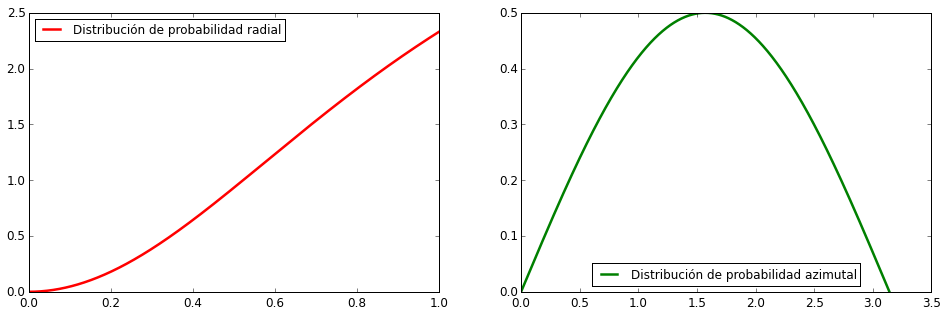

In [12]:
r = np.linspace(0, rc, 1000)
θ = np.linspace(0, np.pi, 1000)
plt.figure(1, figsize=((10 * (1 + np.sqrt(5)) / 2, 5)))
plt.subplot(121)
plt.plot(r, fR(r, rc, rho0),'r-', label="Distribución de probabilidad radial")
plt.legend(loc=0)
plt.subplot(122)
plt.plot(θ, fTh(θ),'g-', label="Distribución de probabilidad azimutal")
plt.legend(loc=0);

In [13]:
print(integrate.quad(lambda x: fR(x, rc, rho0), 0, rc)) #Integro numéricamente la distribución radial

(1.0, 1.1102230246251565e-14)


Ahora por el método Monte Carlo aceptación-rechazo genero números al azar con las distribuciones de antes. Grafico el histograma de cada uno, con la distribución teórica sobrepuesta

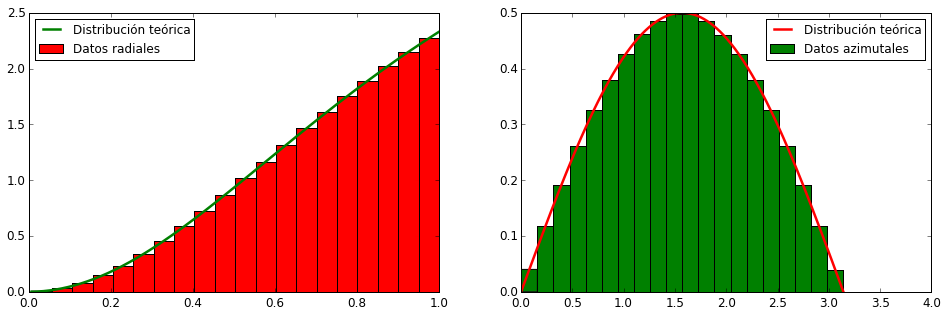

In [14]:
#Vectores para contabilizaar datos
N = 10e6 #Es mucho más de lo que pide el ejercicio, pero, el histograma 2D queda mucho mejor así
Ar = []
Ath = []
#Variables aleatorias, con N muestras
r = rnd.uniform(0, rc, N) #Uniforme entre 0 y rc, valores posibles del radio
vR = rnd.uniform(0, fR(rc,rc,rho0), N) #Uniforme entre 0 y f(rc), valores posibles de la distribución radial
th = rnd.uniform(0, 2*np.pi, N) #Uniforme entre 0 y 2pi, valores posibles del ángulo
vTh = rnd.uniform(0, 0.5, N) #Uniforme entre 0 y 0.5, valores posibles de la distribución angular

#Usando indices de los ndarrays acelero muchisimo las operaciones. Para 100M t<0,5min.
Ar = r[fR(r, rc, rho0)>vR] #Estos son los valores de r que me guardo
Ath = th[fTh(th)> vTh] #Estos son los valores de r que me guardo
#Grafico ambos histogramas

plt.figure(2, figsize=((10 * (1 + np.sqrt(5)) / 2, 5)))
plt.subplot(121)
n, bins, patches = plt.hist(Ar, bins=20, color='r', normed= True, label="Datos radiales")
x = np.linspace(np.amin(bins), np.amax(bins), 1000)
plt.plot(x, fR(x, rc, rho0), "g-", label="Distribución teórica")
plt.legend(loc=0)
plt.subplot(122)
plt.xlim((0,4))
n, bins, patches = plt.hist(Ath,bins=20, color='g',normed = True, label="Datos azimutales")
x = np.linspace(np.amin(bins), np.amax(bins), 1000)
plt.plot(x, fTh(x), "r-", label="Distribución teórica")
plt.legend(loc=0);

Ahora grafico ambos histogramas a la vez, para observar las curvas de covarianza. La distribución nos indica que vamos a ver elipses sin correlación

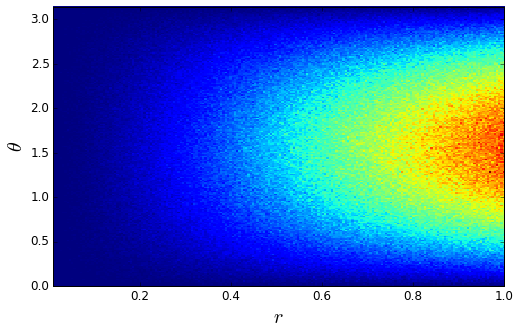

In [23]:
#Como no puedo prefijar la cantidad de cuentas, elijo la cantidad más chica
L = 0
if (len(Ar)<len(Ath)):
    L = len(Ar)
else:
    L = len(Ath)
plt.xlabel(r"$r$")
plt.ylabel(r"$\theta$")
plt.hist2d(Ar[:L],Ath[:L], bins = 200);

Para completar, veamos la cantidad de cuentas generadas por el método, frente al valor de muestras total

In [24]:
print(L,N)

3182074 10000000.0


Donde se ve que se toman un 3% de todas las cuentas tomadas. Este método no es muy eficiente